In [1]:
from astropy.io import fits
from astropy.table import QTable, Table, Column
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fits_file = fits.open('spec-0278-51900-0382.fits')
fits_file.info()

Filename: spec-0278-51900-0382.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  COADD         1 BinTableHDU     26   3831R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B2-00007737-00007741-00007742    1 BinTableHDU    145   2047R x 7C   [E, E, E, J, E, E, E]   
  5  B2-00007738-00007741-00007742    1 BinTableHDU    145

In [3]:
spec_data = fits_file[1].data
spec_data

FITS_rec([(34.898125, 3.5815, 0.06318544, 0, 0, 1.1328629 , 8.2795515, 38.417995),
          (29.140358, 3.5816, 0.07321259, 0, 0, 1.132615  , 7.948678 , 36.403973),
          (27.11504 , 3.5817, 0.08129604, 0, 0, 1.1323668 , 7.5953674, 34.697636),
          ...,
          (45.536453, 3.9643, 0.2691871 , 0, 0, 0.72552156, 4.98734  , 45.081158),
          (44.312862, 3.9644, 0.2712474 , 0, 0, 0.7256636 , 5.5709195, 44.86397 ),
          (43.24691 , 3.9645, 0.26084986, 0, 0, 0.7258079 , 6.291331 , 45.20196 )],
         dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

In [4]:
fits_file[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =                 3831 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    8 / number of table fields                         
TTYPE1  = 'flux    '                                                            
TFORM1  = 'E       '                                                            
TTYPE2  = 'loglam  '                                                            
TFORM2  = 'E       '                                                            
TTYPE3  = 'ivar    '        

In [5]:
spec_data.columns

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)

In [6]:
spec_data.loglam

array([3.5815, 3.5816, 3.5817, ..., 3.9643, 3.9644, 3.9645], dtype=float32)

In [7]:
spec_data.flux

array([34.898125, 29.140358, 27.11504 , ..., 45.536453, 44.312862,
       43.24691 ], dtype=float32)

Text(0, 0.5, 'flux')

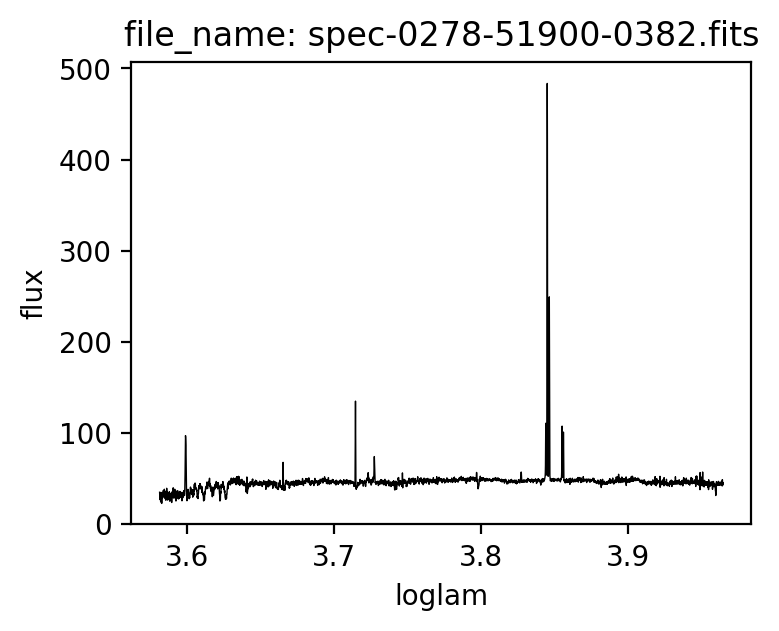

In [8]:
fig1 = plt.figure(num = 1, figsize = (4, 3), dpi = 200)
plt.plot(spec_data.loglam, spec_data.flux, 'black',linewidth = 0.5)
plt.title('file_name: spec-0278-51900-0382.fits')
plt.xlabel('loglam')
plt.ylabel('flux')

In [9]:
fits_file[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1068 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  126 / number of table fields                         
TTYPE1  = 'SURVEY  '                                                            
TFORM1  = '6A      '                                                            
TTYPE2  = 'INSTRUMENT'                                                          
TFORM2  = '4A      '                                                            
TTYPE3  = 'CHUNK   '        

In [10]:
spec_data_2 = fits_file[2].data
spec_data_2.Z
z = spec_data_2.Z[0]
print(z,spec_data_2.Z)

0.06587284 [0.06587284]


In [11]:
lamda = spec_data.loglam
lamda 

array([3.5815, 3.5816, 3.5817, ..., 3.9643, 3.9644, 3.9645], dtype=float32)

In [12]:
lamda_rf = np.zeros(shape = lamda.shape)
lamda[3830]

3.9645

In [13]:
lamda_rf.shape
z.dtype

dtype('float32')

In [14]:
for i in range(3831):
    lamda_rf[i] = 10 ** lamda[i]/(1 + z)
    print(lamda_rf[i])

3579.271622915152
3580.0950296483065
3580.920591655001
3581.7443777312465
3582.5683533183974
3583.3944856680664
3584.2188408603793
3585.0453538088314
3585.87008878119
3586.696982503765
3587.5220974311346
3588.3493721032555
3589.1748671606815
3590.00055212216
3590.828398320459
3591.654463674608
3592.482691261258
3593.309137183324
3594.1377463340305
3594.9645729993413
3595.7915898750393
3596.620771473854
3597.4481693558346
3598.2777329582186
3599.105512022011
3599.9354578039533
3600.7636182251686
3601.5919691636004
3602.4224883170677
3603.251220876384
3604.0821226496314
3604.911237005645
3605.742521574946
3606.5720179035507
3607.401705056695
3608.2335639224275
3609.0636333120506
3609.8958754147684
3610.7263272169653
3611.558952733225
3612.389787124174
3613.220812647482
3614.054013386573
3614.8854217629464
3615.7190063572225
3616.5507977630405
3617.384766389344
3618.216941001068
3619.0493070534685
3619.883851830496
3620.7166013535416
3621.551530604953
3622.384663775309
3623.2199776782304


Text(0, 0.5, 'flux')

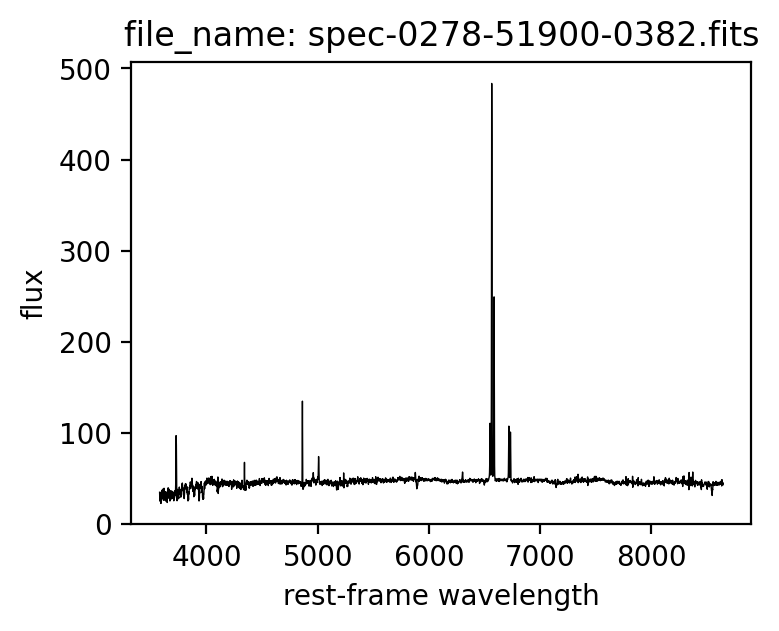

In [15]:
fig2 = plt.figure(num = 1, figsize = (4, 3), dpi = 200)
plt.plot(lamda_rf, spec_data.flux, 'black',linewidth = 0.5)
plt.title('file_name: spec-0278-51900-0382.fits')
plt.xlabel('rest-frame wavelength')
plt.ylabel('flux')

In [16]:
wavelength = np.linspace(3579, 8645, 8645 - 3579 + 1 )
print(wavelength)
print(wavelength.shape)
print(wavelength[0])
print(wavelength[5066])

[3579. 3580. 3581. ... 8643. 8644. 8645.]
(5067,)
3579.0
8645.0


In [17]:
f = interpolate.interp1d(lamda_rf, spec_data.flux)
print(f(wavelength[1]))
print(f(3580))
print(f(8645))

29.804863767350824
29.804863767350824
43.56231927627174


In [18]:
flux_interpolate = np.zeros(shape = wavelength.shape)
flux_interpolate

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
for i in range(1, 5067):
    flux_interpolate[i-1] =  f(wavelength[i])
    print(i, wavelength[i], 'interpolated flux=',f(wavelength[i]))

1 3580.0 interpolated flux= 29.804863767350824
2 3581.0 interpolated flux= 27.200187259598533
3 3582.0 interpolated flux= 29.690474396786183
4 3583.0 interpolated flux= 29.805132556715474
5 3584.0 interpolated flux= 29.829899452465348
6 3585.0 interpolated flux= 25.216750263980572
7 3586.0 interpolated flux= 28.393062474633094
8 3587.0 interpolated flux= 33.35487368043014
9 3588.0 interpolated flux= 30.91792982802128
10 3589.0 interpolated flux= 24.360670777547696
11 3590.0 interpolated flux= 29.327444423108687
12 3591.0 interpolated flux= 24.522837434605453
13 3592.0 interpolated flux= 31.72189313018489
14 3593.0 interpolated flux= 32.99559949934947
15 3594.0 interpolated flux= 32.07993455831816
16 3595.0 interpolated flux= 29.411413846728895
17 3596.0 interpolated flux= 28.73835370940881
18 3597.0 interpolated flux= 29.986721113613246
19 3598.0 interpolated flux= 30.784422892096668
20 3599.0 interpolated flux= 31.863296366390493
21 3600.0 interpolated flux= 36.4206987130192
22 3601.0

1179 4758.0 interpolated flux= 44.75486709272261
1180 4759.0 interpolated flux= 45.44528585577842
1181 4760.0 interpolated flux= 45.251024412777596
1182 4761.0 interpolated flux= 45.91006489189141
1183 4762.0 interpolated flux= 47.13629237889395
1184 4763.0 interpolated flux= 46.85576764862175
1185 4764.0 interpolated flux= 45.541340054486334
1186 4765.0 interpolated flux= 44.18553870354044
1187 4766.0 interpolated flux= 44.34428951300866
1188 4767.0 interpolated flux= 44.38035816055736
1189 4768.0 interpolated flux= 43.46443581322188
1190 4769.0 interpolated flux= 43.99161747684572
1191 4770.0 interpolated flux= 46.132912446182026
1192 4771.0 interpolated flux= 44.842881870401946
1193 4772.0 interpolated flux= 46.41697678848574
1194 4773.0 interpolated flux= 44.82932236516465
1195 4774.0 interpolated flux= 48.18836052982995
1196 4775.0 interpolated flux= 47.495490616177605
1197 4776.0 interpolated flux= 46.46415347312533
1198 4777.0 interpolated flux= 47.0201648383027
1199 4778.0 inte

1616 5195.0 interpolated flux= 43.94691700790207
1617 5196.0 interpolated flux= 43.41440433420273
1618 5197.0 interpolated flux= 44.121862147144846
1619 5198.0 interpolated flux= 47.19350813765267
1620 5199.0 interpolated flux= 50.03936975924164
1621 5200.0 interpolated flux= 48.62303828867176
1622 5201.0 interpolated flux= 50.43780070303866
1623 5202.0 interpolated flux= 50.93765468708061
1624 5203.0 interpolated flux= 49.971509462892115
1625 5204.0 interpolated flux= 47.21093934594252
1626 5205.0 interpolated flux= 44.31781266320032
1627 5206.0 interpolated flux= 43.834614071597116
1628 5207.0 interpolated flux= 43.98361126625668
1629 5208.0 interpolated flux= 42.28676094366372
1630 5209.0 interpolated flux= 42.88819145011134
1631 5210.0 interpolated flux= 43.778109176054954
1632 5211.0 interpolated flux= 43.753567700608635
1633 5212.0 interpolated flux= 43.457011982983715
1634 5213.0 interpolated flux= 45.555801258046564
1635 5214.0 interpolated flux= 47.156116555259466
1636 5215.0 

4377 7956.0 interpolated flux= 46.01425045962343
4378 7957.0 interpolated flux= 45.38700139051482
4379 7958.0 interpolated flux= 44.778619254504775
4380 7959.0 interpolated flux= 44.26097794625766
4381 7960.0 interpolated flux= 44.42416401340693
4382 7961.0 interpolated flux= 45.926339472321125
4383 7962.0 interpolated flux= 45.94234603178482
4384 7963.0 interpolated flux= 44.50721886762249
4385 7964.0 interpolated flux= 44.63349149014536
4386 7965.0 interpolated flux= 45.52859998082645
4387 7966.0 interpolated flux= 46.55306629883461
4388 7967.0 interpolated flux= 47.58899367972337
4389 7968.0 interpolated flux= 46.27877667829419
4390 7969.0 interpolated flux= 45.47116773625405
4391 7970.0 interpolated flux= 47.14270845358497
4392 7971.0 interpolated flux= 47.826918757464064
4393 7972.0 interpolated flux= 46.55420851126682
4394 7973.0 interpolated flux= 46.22900124032592
4395 7974.0 interpolated flux= 46.861493080610096
4396 7975.0 interpolated flux= 46.31883175535077
4397 7976.0 inte

4588 8167.0 interpolated flux= 45.70065498027903
4589 8168.0 interpolated flux= 46.14734716102786
4590 8169.0 interpolated flux= 46.08434905848432
4591 8170.0 interpolated flux= 46.64925962459633
4592 8171.0 interpolated flux= 47.79866358555804
4593 8172.0 interpolated flux= 47.55453312604194
4594 8173.0 interpolated flux= 46.50607236616611
4595 8174.0 interpolated flux= 46.000727654425724
4596 8175.0 interpolated flux= 45.67236209019106
4597 8176.0 interpolated flux= 46.32666500870872
4598 8177.0 interpolated flux= 47.128458549886496
4599 8178.0 interpolated flux= 46.971739186144305
4600 8179.0 interpolated flux= 46.8528369194617
4601 8180.0 interpolated flux= 47.13702868998062
4602 8181.0 interpolated flux= 47.06760700127231
4603 8182.0 interpolated flux= 45.75659203287834
4604 8183.0 interpolated flux= 45.10543153459138
4605 8184.0 interpolated flux= 45.73690643625667
4606 8185.0 interpolated flux= 46.099764523235365
4607 8186.0 interpolated flux= 46.137993664952596
4608 8187.0 inte

In [20]:
print(flux_interpolate.shape)
print(flux_interpolate)

(5067,)
[29.80486377 27.20018726 29.6904744  ... 44.09839157 43.56231928
  0.        ]


Text(0, 0.5, 'interpolated flux')

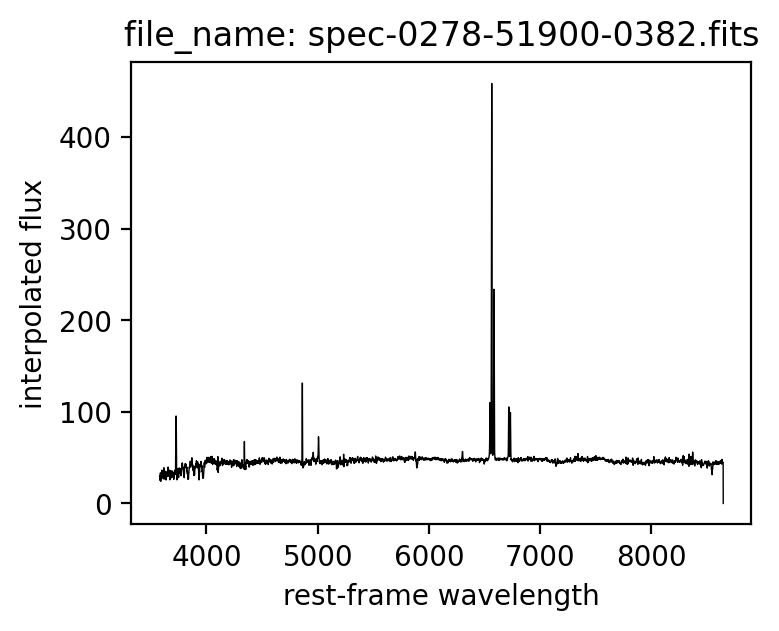

In [21]:
fig3 = plt.figure(num = 1, figsize = (4, 3), dpi = 200)
plt.plot(wavelength, flux_interpolate, 'black',linewidth = 0.5)
plt.title('file_name: spec-0278-51900-0382.fits')
plt.xlabel('rest-frame wavelength')
plt.ylabel('interpolated flux')

In [22]:
starlight_input = (flux_interpolate, wavelength)

In [23]:
starlight_input

(array([29.80486377, 27.20018726, 29.6904744 , ..., 44.09839157,
        43.56231928,  0.        ]),
 array([3579., 3580., 3581., ..., 8643., 8644., 8645.]))

In [24]:
print(flux_interpolate, wavelength)

[29.80486377 27.20018726 29.6904744  ... 44.09839157 43.56231928
  0.        ] [3579. 3580. 3581. ... 8643. 8644. 8645.]


In [25]:
np.savetxt('starlight_input.txt', (wavelength, flux_interpolate))

In [26]:
for i in range(1, 5067):
    print(wavelength[i], f(wavelength[i]), 0, 0 )

3580.0 29.804863767350824 0 0
3581.0 27.200187259598533 0 0
3582.0 29.690474396786183 0 0
3583.0 29.805132556715474 0 0
3584.0 29.829899452465348 0 0
3585.0 25.216750263980572 0 0
3586.0 28.393062474633094 0 0
3587.0 33.35487368043014 0 0
3588.0 30.91792982802128 0 0
3589.0 24.360670777547696 0 0
3590.0 29.327444423108687 0 0
3591.0 24.522837434605453 0 0
3592.0 31.72189313018489 0 0
3593.0 32.99559949934947 0 0
3594.0 32.07993455831816 0 0
3595.0 29.411413846728895 0 0
3596.0 28.73835370940881 0 0
3597.0 29.986721113613246 0 0
3598.0 30.784422892096668 0 0
3599.0 31.863296366390493 0 0
3600.0 36.4206987130192 0 0
3601.0 33.18550077959845 0 0
3602.0 33.29388164609284 0 0
3603.0 32.011113685337506 0 0
3604.0 32.45701427548562 0 0
3605.0 35.058958606327046 0 0
3606.0 35.37812414948638 0 0
3607.0 29.164027814678033 0 0
3608.0 32.98149491474232 0 0
3609.0 29.639529002361243 0 0
3610.0 28.777157607079122 0 0
3611.0 32.44708081220483 0 0
3612.0 30.819777065639506 0 0
3613.0 26.91438823808602

7294.0 47.07159732610375 0 0
7295.0 46.617765314414946 0 0
7296.0 45.3388372562221 0 0
7297.0 46.02203101488305 0 0
7298.0 46.96284682702156 0 0
7299.0 47.21753378351844 0 0
7300.0 47.72083144622315 0 0
7301.0 48.49957661706808 0 0
7302.0 48.20768315760264 0 0
7303.0 47.74315947679648 0 0
7304.0 48.10088982860068 0 0
7305.0 48.372150340435006 0 0
7306.0 48.52948120101153 0 0
7307.0 48.14671693286069 0 0
7308.0 47.60690423337203 0 0
7309.0 47.4306800624879 0 0
7310.0 47.01912224240657 0 0
7311.0 46.23179346119206 0 0
7312.0 48.32626783964298 0 0
7313.0 51.55855698193976 0 0
7314.0 49.19022732857983 0 0
7315.0 47.21488649164851 0 0
7316.0 46.03311081783131 0 0
7317.0 46.89830452722099 0 0
7318.0 48.87313366019603 0 0
7319.0 48.32523842533716 0 0
7320.0 48.05284500402308 0 0
7321.0 48.76028093423902 0 0
7322.0 49.704108455866134 0 0
7323.0 50.80955042399706 0 0
7324.0 49.37968191731708 0 0
7325.0 48.56985388603457 0 0
7326.0 50.87724636810029 0 0
7327.0 50.474921970784855 0 0
7328.0 47.68

8258.0 45.544671499399016 0 0
8259.0 45.725249761020535 0 0
8260.0 46.34026850973345 0 0
8261.0 46.31808348466598 0 0
8262.0 46.0518769482724 0 0
8263.0 45.79620448630077 0 0
8264.0 45.542800314780756 0 0
8265.0 46.185560615692246 0 0
8266.0 46.910822450590935 0 0
8267.0 47.75621009834373 0 0
8268.0 48.32003747779499 0 0
8269.0 46.613300756158175 0 0
8270.0 45.48202680306987 0 0
8271.0 46.53786417385959 0 0
8272.0 47.0000690808813 0 0
8273.0 46.08574137758585 0 0
8274.0 45.2915353474974 0 0
8275.0 44.67870453775124 0 0
8276.0 44.219697874569846 0 0
8277.0 43.91756865758205 0 0
8278.0 44.30875390962134 0 0
8279.0 45.18819597933993 0 0
8280.0 43.958338690374376 0 0
8281.0 41.74752770480104 0 0
8282.0 45.44579193978872 0 0
8283.0 50.875635191458194 0 0
8284.0 49.1414944109209 0 0
8285.0 46.320633936741814 0 0
8286.0 49.38278648757731 0 0
8287.0 52.41231582338456 0 0
8288.0 50.197143763689176 0 0
8289.0 48.094701533154264 0 0
8290.0 46.65243856176921 0 0
8291.0 45.525400208068 0 0
8292.0 4

In [27]:
for i in range(1, 5067):
    print(wavelength[i], f(wavelength[i]))

3580.0 29.804863767350824
3581.0 27.200187259598533
3582.0 29.690474396786183
3583.0 29.805132556715474
3584.0 29.829899452465348
3585.0 25.216750263980572
3586.0 28.393062474633094
3587.0 33.35487368043014
3588.0 30.91792982802128
3589.0 24.360670777547696
3590.0 29.327444423108687
3591.0 24.522837434605453
3592.0 31.72189313018489
3593.0 32.99559949934947
3594.0 32.07993455831816
3595.0 29.411413846728895
3596.0 28.73835370940881
3597.0 29.986721113613246
3598.0 30.784422892096668
3599.0 31.863296366390493
3600.0 36.4206987130192
3601.0 33.18550077959845
3602.0 33.29388164609284
3603.0 32.011113685337506
3604.0 32.45701427548562
3605.0 35.058958606327046
3606.0 35.37812414948638
3607.0 29.164027814678033
3608.0 32.98149491474232
3609.0 29.639529002361243
3610.0 28.777157607079122
3611.0 32.44708081220483
3612.0 30.819777065639506
3613.0 26.91438823808602
3614.0 30.704638101145598
3615.0 34.741737926137155
3616.0 35.968635597191124
3617.0 31.433451843698272
3618.0 32.587463189213715
3

6235.0 46.1737675368707
6236.0 46.774740953500086
6237.0 47.89619829594466
6238.0 47.54839571098484
6239.0 46.83408864436379
6240.0 46.55270990417319
6241.0 46.00452358674347
6242.0 45.75962591968956
6243.0 45.99636702854764
6244.0 45.586337544295304
6245.0 45.108297328444074
6246.0 44.67982325242505
6247.0 45.04411466913709
6248.0 45.6890595552716
6249.0 46.489496159495545
6250.0 47.34227720885151
6251.0 47.94302663345836
6252.0 47.99603973789868
6253.0 47.16244416423045
6254.0 46.62292990371187
6255.0 45.6144494299108
6256.0 44.14503247443586
6257.0 45.58908378697819
6258.0 46.198290594308695
6259.0 46.095112541007296
6260.0 45.24651713699887
6261.0 45.27565413443954
6262.0 45.471210495872526
6263.0 45.12512108726657
6264.0 45.862230630373354
6265.0 46.36594043151648
6266.0 46.11548298514043
6267.0 46.4043420711553
6268.0 46.42751659537116
6269.0 46.165826813689876
6270.0 46.28116980903685
6271.0 46.61424345760579
6272.0 47.02670830325767
6273.0 47.134689370581555
6274.0 47.511614175

6687.0 47.89316196493594
6688.0 48.62346544682881
6689.0 48.73350860584788
6690.0 48.68786204275262
6691.0 48.47655470852931
6692.0 48.66093897288484
6693.0 48.80482914503214
6694.0 48.85484611814305
6695.0 49.08401263064166
6696.0 49.30768017259717
6697.0 49.46022523988888
6698.0 48.539540927373544
6699.0 47.40181993557973
6700.0 46.54341160385289
6701.0 46.57278290251886
6702.0 47.14288569309601
6703.0 48.540499374488775
6704.0 49.2568223666519
6705.0 49.47212964398424
6706.0 48.82671871664338
6707.0 48.84256341336993
6708.0 49.463398717383804
6709.0 49.991480716385
6710.0 50.510826155202345
6711.0 51.021738354055046
6712.0 51.350962929002556
6713.0 52.64839441752246
6714.0 55.858565069577544
6715.0 65.93313908818135
6716.0 79.22961284782684
6717.0 96.85813237482694
6718.0 104.52180157797397
6719.0 105.4156481429336
6720.0 92.24474985827725
6721.0 77.13709919020815
6722.0 61.366229367382175
6723.0 54.72035259794568
6724.0 51.57317294777701
6725.0 51.744081547936524
6726.0 51.26140732

In [40]:
help("pystarlight")

Help on package pystarlight:

NAME
    pystarlight

DESCRIPTION
    # This program is free software; you can redistribute it and/or
    # modify it under the terms of the GNU General Public License
    # as published by the Free Software Foundation; either version 2
    # of the License, or (at your option) any later version.

PACKAGE CONTENTS
    io (package)
    plots (package)
    util (package)
    version

FILE
    /home/ubuntu/anaconda3/lib/python3.9/site-packages/pystarlight/__init__.py




Text(0, 0.5, 'flux')

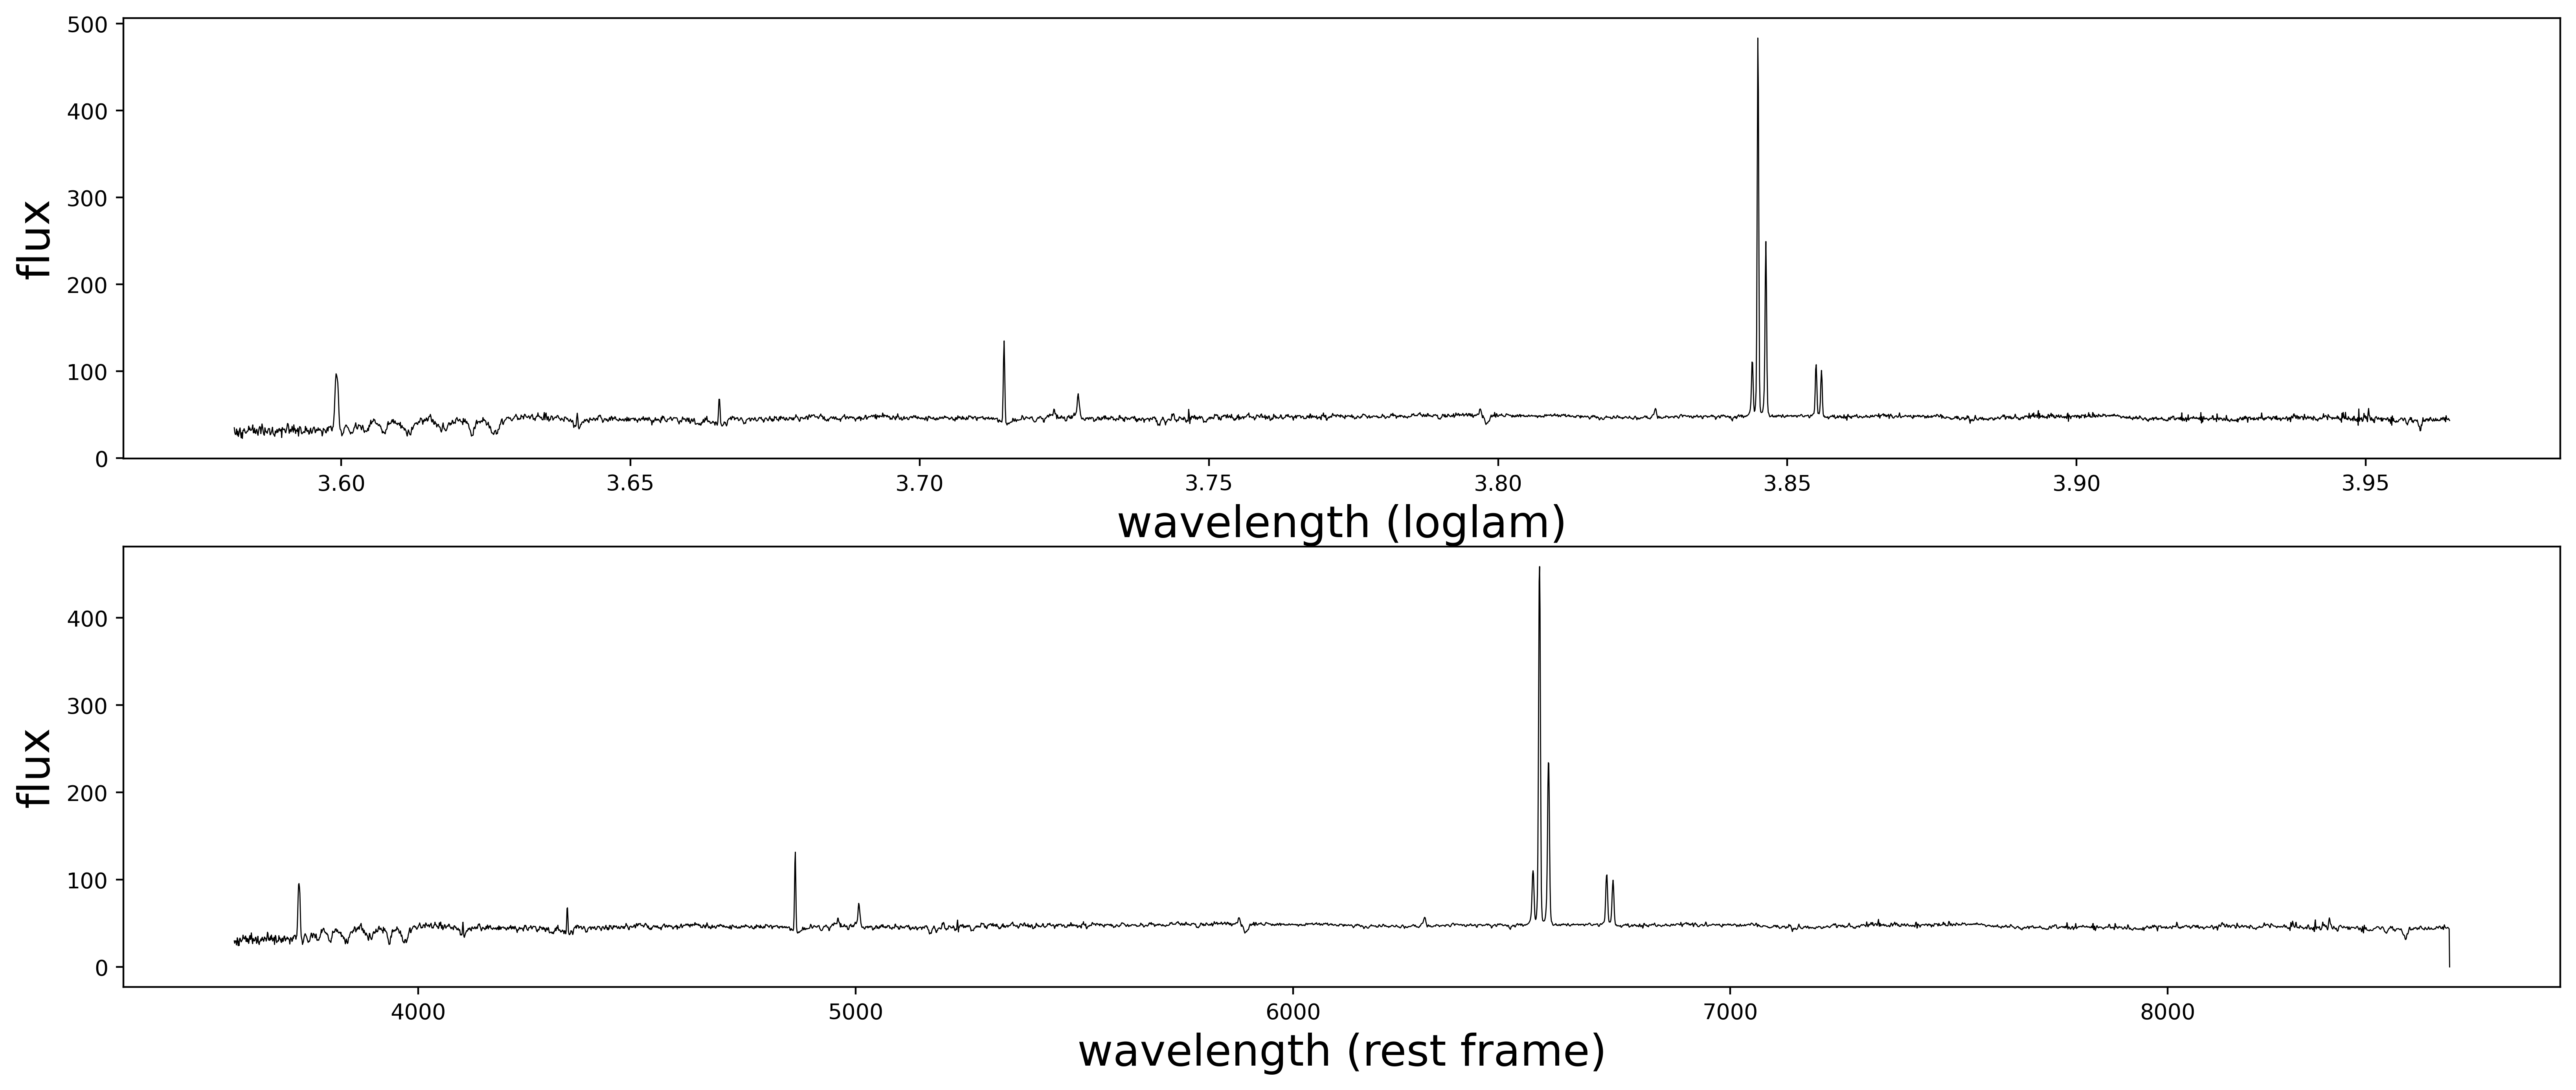

In [115]:
plt.figure(figsize = (20,8),dpi = 400)
ax1 = plt.subplot(2, 1, 1)
ax1.set_xlabel("wavelength (loglam)", fontsize=20)
plt.plot(spec_data.loglam, spec_data.flux, 'black',linewidth = 0.5)
plt.ylabel("flux", fontsize = 20)
ax2 = plt.subplot(2, 1, 2)
ax2.set_xlabel("wavelength (rest frame)", fontsize=20)
plt.plot(wavelength, flux_interpolate, 'black',linewidth = 0.5)
plt.ylabel("flux", fontsize = 20)